In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import tensorflow.keras.backend as K


def euclidean_distance(vectors):
    x, y = vectors
    return tf.sqrt(tf.reduce_sum(tf.square(x - y), axis=1, keepdims=True))


def contrastive_loss(y_true, y_pred, margin=1.0):
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

def accuracy(y_true, y_pred):
    margin = 0.5
    prediction = K.cast(y_pred < margin, y_pred.dtype)
    y_true = K.cast(y_true, prediction.dtype)
    return K.mean(K.equal(prediction, y_true))

model = tf.keras.models.load_model(
    "/content/my_model.h5",
    custom_objects={
        'euclidean_distance': euclidean_distance,
        'contrastive_loss': contrastive_loss,
        'accuracy': accuracy
    }
)

print("Model loaded successfully!")
model.summary()


Model loaded successfully!


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img_A_inp           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ img_B_inp           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_9        │ (None, 512)       │  1,553,664 │ img_A_inp[0][0],  │
│ (Sequential)        │                   │            │ img_B_inp[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_1          │ (None, 512)       │          0 │ sequential_9[0][… │
│ (Subtract)          │                   │            │ sequential_9[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │        513 │ subtract_1[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,554,177 (5.93 MB)

 Trainable params: 1,552,257 (5.92 MB)

 Non-trainable params: 1,920 (7.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


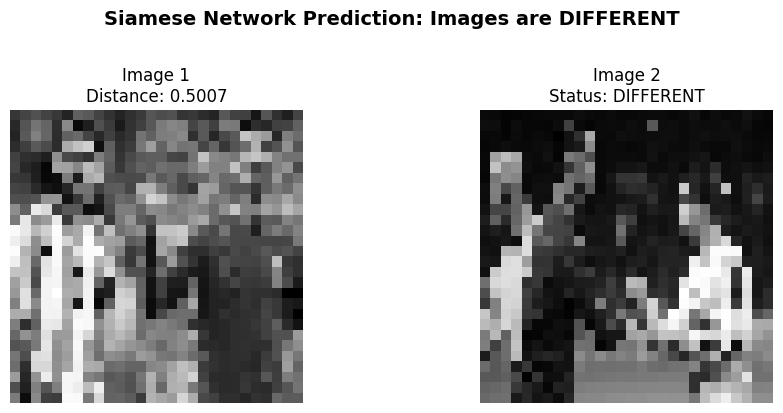

Euclidean distance: 0.5007
Images are DIFFERENT (threshold=0.5)


In [ ]:
import matplotlib.pyplot as plt
def preprocess_image(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_display = cv2.resize(img, (28, 28))
    img_processed = cv2.resize(img, (28, 28))
    img_processed = img_processed.astype("float32") / 255.0
    img_processed = np.expand_dims(img_processed, axis=(0, -1))  # (1, 28, 28, 1)
    return img_processed, img_display


img1_path = "/content/img1.jpg"
img2_path = "/content/img2.jpg"

img1_processed, img1_display = preprocess_image(img1_path)
img2_processed, img2_display = preprocess_image(img2_path)


distance = model.predict([img1_processed, img2_processed])[0][0]
similarity_status = "SIMILAR" if distance < 0.5 else "DIFFERENT"


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img1_display, cmap='gray')
plt.title(f"Image 1\nDistance: {distance:.4f}", fontsize=12)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_display, cmap='gray')
plt.title(f"Image 2\nStatus: {similarity_status}", fontsize=12)
plt.axis('off')

plt.suptitle(f"Siamese Network Prediction: Images are {similarity_status}",
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"Euclidean distance: {distance:.4f}")
print(f"Images are {'SIMILAR' if distance < 0.5 else 'DIFFERENT'} (threshold=0.5)")
